# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 584
['orchard homes', 'atafu village', 'chongwe', 'adamstown', 'oamaru', 'bilibino', 'grytviken', 'utrik', 'eyl', 'bonthe', 'lorengau', 'peterhead', 'la passe', 'harper', 'corner brook', 'ancud', 'udachny', 'fale old settlement', 'mezhdurechensk', 'murzuq', 'susuman', 'port-aux-francais', 'port mathurin', 'whitehorse', 'olonkinbyen', 'karratha', 'yuzhno-kurilsk', 'albany', 'hermanus', 'newman', 'belyy yar', 'notse', 'los alamos', 'ushuaia', 'puerto ayora', 'aasiaat', 'iqaluit', 'hirara', 'afaahiti', 'tazovsky', 'puerto natales', 'blackmans bay', 'knokke-heist', 'flin flon', 'wailua homesteads', 'hami', 'lebu', 'kyain seikgyi township', 'cordova', 'ulan bator', 'happy valley-goose bay', 'yellowknife', 'petropavlovsk-kamchatsky', 'isafjordur', 'port elizabeth', 'al wakrah', 'san antonio de pale', 'etikoppaka', 'waitangi', 'uturoa', 'vingt cinq', 'thompson', 'bhamo', 'sarikei', 'jamestown', 'taksimo', 'as sanad', 'moab', 'san patricio', 'ad dawadimi', 'boende

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [226]:
# Set the API base URL
url = https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format from the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so it can be readable to humans
       
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

SyntaxError: invalid syntax (2918037654.py, line 2)

In [228]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,orchard homes,46.8633,-114.0484,21.08,50,0,6.69,US,2024-08-08
1,atafu village,-8.5421,-172.5159,28.10,79,100,9.17,TK,2024-08-08
2,chongwe,-15.3292,28.6820,19.66,32,18,2.41,ZM,2024-08-08
3,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,2024-08-08
4,oamaru,-45.0784,170.9801,4.33,78,3,2.78,NZ,2024-08-08


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orchard homes,46.8633,-114.0484,21.08,50,0,6.69,US,2024-08-08
1,atafu village,-8.5421,-172.5159,28.10,79,100,9.17,TK,2024-08-08
2,chongwe,-15.3292,28.6820,19.66,32,18,2.41,ZM,2024-08-08
3,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,2024-08-08
4,oamaru,-45.0784,170.9801,4.33,78,3,2.78,NZ,2024-08-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

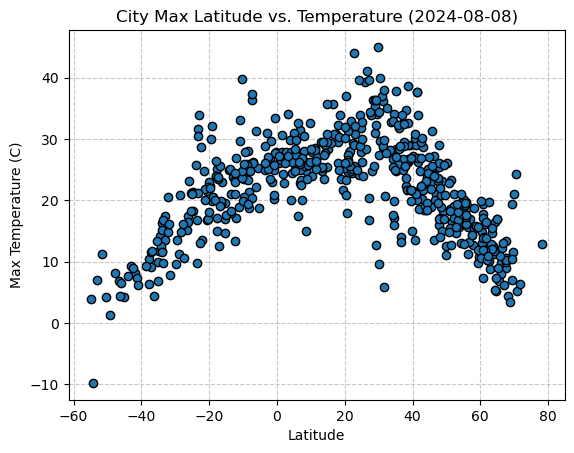

In [50]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({'2024-08-08'})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

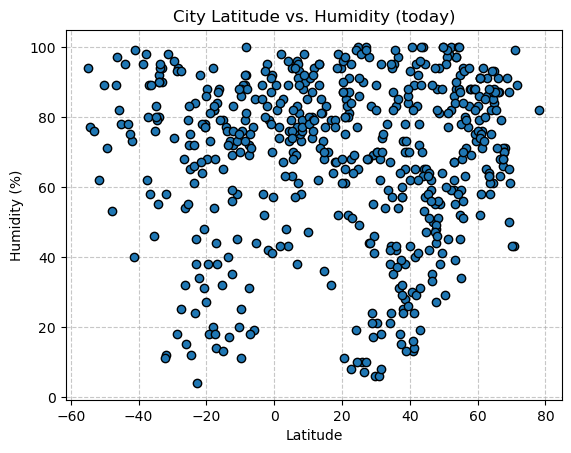

In [40]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({'2024-08-08'})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

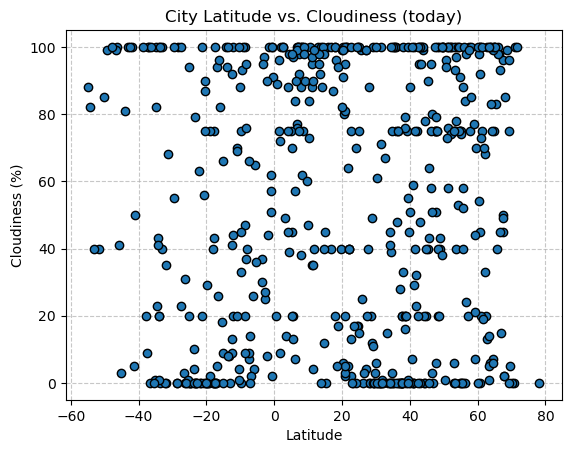

In [42]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({'2024-08-08'})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

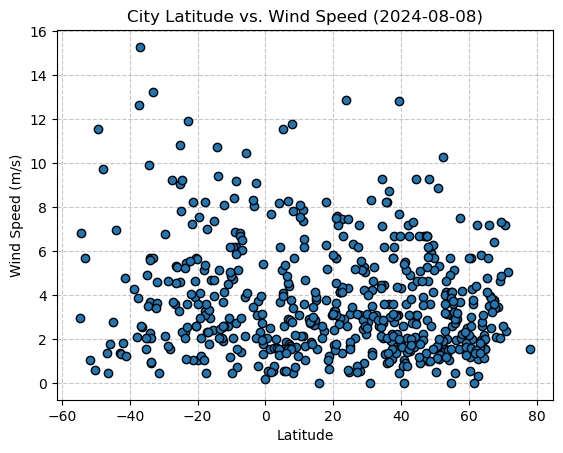

In [48]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({'2024-08-08'})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [172]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# OPTIONAL: Create a function to create Linear Regression plots
def linear_agression(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orchard homes,46.8633,-114.0484,21.08,50,0,6.69,US,2024-08-08
5,bilibino,68.0546,166.4372,4.45,71,85,2.08,RU,2024-08-08
7,utrik,11.2278,169.8474,28.28,79,35,7.86,MH,2024-08-08
8,eyl,7.9803,49.8164,25.48,73,88,11.79,SO,2024-08-08
9,bonthe,7.5264,-12.5050,25.49,75,100,3.75,SL,2024-08-08


In [174]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.10,79,100,9.17,TK,2024-08-08
2,chongwe,-15.3292,28.6820,19.66,32,18,2.41,ZM,2024-08-08
3,adamstown,-25.0660,-130.1015,21.25,72,94,9.03,PN,2024-08-08
4,oamaru,-45.0784,170.9801,4.33,78,3,2.78,NZ,2024-08-08
6,grytviken,-54.2811,-36.5092,-9.75,77,82,6.81,GS,2024-08-08


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temp (F)')

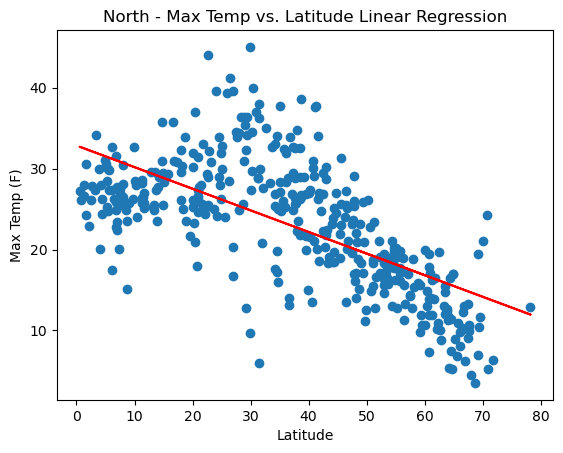

In [190]:
#create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp') on Northern Hemispher
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("North - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")



Text(0, 0.5, 'Max Temp (F)')

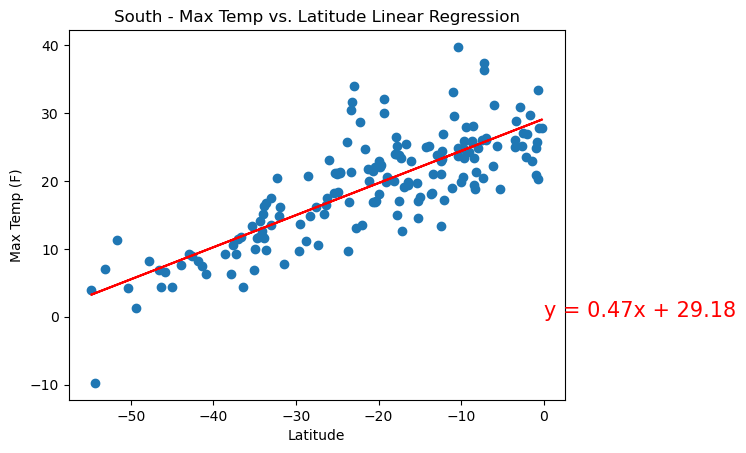

In [194]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("South - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The provided scatter plots with linear regression lines illustrate the relationship between latitude and maximum temperature (measured in Fahrenheit) for both the Northern and Southern Hemispheres. Here’s a detailed analysis based on the observed data and the regression analysis.

1. Scatter Plot Overview:
Both scatter plots show a clear trend between latitude and maximum temperature.
In the Southern Hemisphere, as latitude increases (moving towards the equator), the maximum temperature increases.
In the Northern Hemisphere, as latitude increases (moving away from the equator), the maximum temperature decreases.
2. Linear Regression Analysis:
The regression line in the Southern Hemisphere plot has a positive slope y=0.47x+29.18), indicating that maximum temperature increases as latitude approaches the equator.
The regression line in the Northern Hemisphere plot has a negative slope, indicating that maximum temperature decreases as latitude increases away from the equator.
3. Statistical Significance:
The positive slope in the Southern Hemisphere suggests a strong linear relationship between latitude and maximum temperature. As we move closer to the equator (decreasing latitude), temperatures rise significantly.
The negative slope in the Northern Hemisphere also suggests a strong linear relationship, but in the opposite direction. As we move away from the equator (increasing latitude), temperatures drop significantly.

4. Conclusion:
The linear regression analysis for both hemispheres indicates a significant linear relationship between latitude and maximum temperature, but with opposite trends.
In the Southern Hemisphere, maximum temperatures increase as latitude decreases (approaching the equator).
In the Northern Hemisphere, maximum temperatures decrease as latitude increases (moving away from the equator).
This analysis reinforces the understanding of how latitude influences climate, with equatorial regions being warmer and polar regions being cooler. It also highlights the importance of considering latitude in climatological and meteorological studies.

In summary, the analysis reveals a clear and opposite linear relationship between latitude and maximum temperature in the Northern and Southern Hemispheres, reflecting the fundamental climatic patterns driven by the earth's tilt and the distribution of solar energy.


### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity (%)')

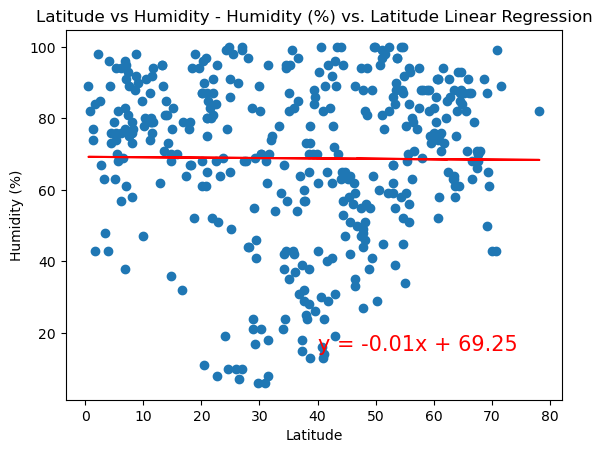

In [196]:
# Northern Hemisphere
# YOUR CODE HERE
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Latitude vs Humidity - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")



Text(0, 0.5, 'Humidity (%)')

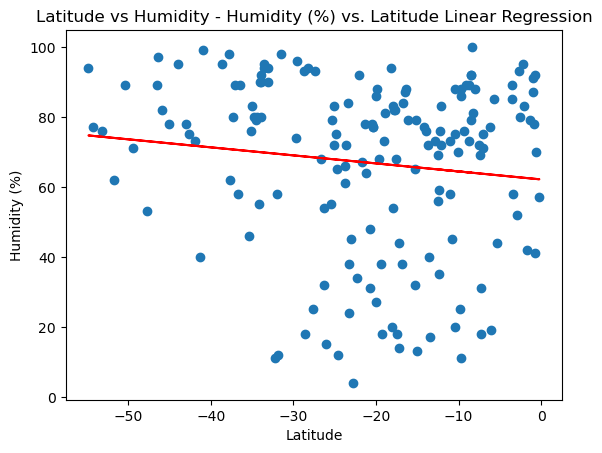

In [198]:
# Southern Hemisphere
# YOUR CODE HERE
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Latitude vs Humidity - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Comparative Discussion on the Linear Relationship between Latitude and Humidity in the Northern and Southern Hemispheres
The provided scatter plots with linear regression lines illustrate the relationship between latitude and humidity (measured in percentage) for both the Northern and Southern Hemispheres. Here’s a detailed analysis based on the observed data and the regression analysis.

1. Scatter Plot Overview:
Both scatter plots exhibit a broad dispersion of humidity percentages across different latitudes.
There is notable variability in humidity at nearly all latitudes, with data points scattered across the entire range from 0% to 100%.
2. Linear Regression Analysis:
The red lines in both plots represent the linear regression lines fitted to the data.
In the Southern Hemisphere, the regression line has a slight negative slope, indicating a minor decrease in humidity as latitude increases.
In the Northern Hemisphere, the regression line is nearly flat, with a very slight negative slope. The equation for the Northern Hemisphere regression line is explicitly shown: 
y=−0.01x+69.25, indicating a negligible decrease in humidity with increasing latitude.
3. Statistical Significance:
The regression lines in both hemispheres suggest only a slight negative trend between latitude and humidity.
The low slope values and the expected low R-squared values suggest that latitude alone does not significantly explain the variability in humidity. Most of the variability is due to other factors not accounted for by latitude.

4. Conclusion:
The linear regression analysis for both hemispheres indicates no significant linear relationship between latitude and humidity. While latitude may have some influence, it is not a dominant factor in determining humidity percentages.
The slight negative trend observed in both hemispheres suggests that other factors have a more substantial impact on humidity. These factors could include local meteorological conditions, geographical features, and temporal variations.
To better understand the factors affecting humidity, further analysis incorporating additional variables and more sophisticated modeling techniques would be necessary. This could include studying the effects of local atmospheric pressure systems, humidity levels, and seasonal changes.

In summary, the analysis reveals that latitude has a minor but consistent negative influence on humidity in both hemispheres. This highlights the complexity of humidity determinants and the importance of a multifaceted approach in climatological studies. The global consistency in these findings reinforces the importance of considering multiple factors when studying humidity patterns.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness (%)')

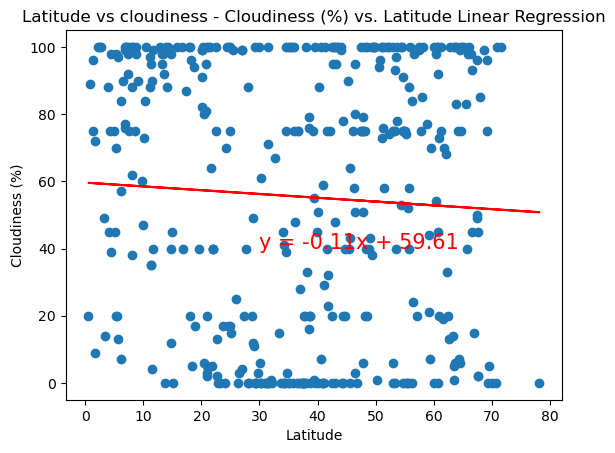

In [204]:
# Northern Hemisphere
# YOUR CODE HERE

# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Latitude vs cloudiness - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")



Text(0, 0.5, 'Cloudiness (%)')

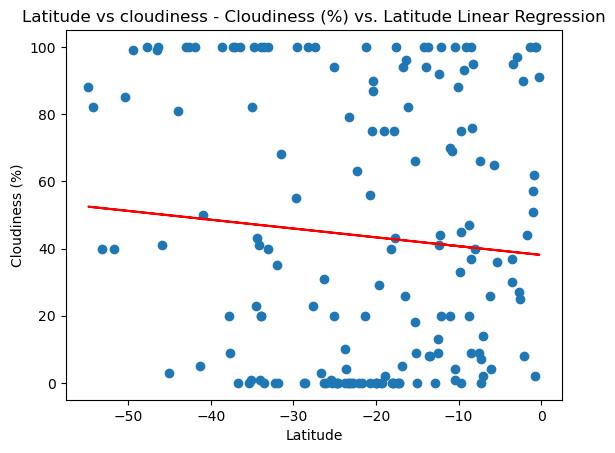

In [208]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE

# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Latitude vs cloudiness - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")


**Discussion about the linear relationship:** 
The provided scatter plots with linear regression lines illustrate the relationship between latitude and cloudiness (measured in percentage) for both the Northern and Southern Hemispheres. Here’s a detailed analysis based on the observed data and the regression analysis.

1. Scatter Plot Overview:
Both scatter plots exhibit a broad dispersion of cloudiness percentages across different latitudes.
There is a notable variability in cloudiness at nearly all latitudes, with data points scattered across the entire range from 0% to 100%.
2. Linear Regression Analysis:
The red lines in both plots represent the linear regression lines fitted to the data.
In both hemispheres, the regression lines have a slight negative slope, indicating a minor decrease in cloudiness as latitude increases.
The equation for the Northern Hemisphere regression line is explicitly shown: y=−0.11x+59.61. This indicates that for each degree increase in latitude, cloudiness decreases by 0.11%.
3. Statistical Significance:
The regression lines in both hemispheres suggest only a slight negative trend between latitude and cloudiness.
The low slope values and the expected low R-squared values suggest that latitude alone does not significantly explain the variability in cloudiness. Most of the variability is due to other factors not accounted for by latitude.
4. Conclusion:
The linear regression analysis for both hemispheres indicates no significant linear relationship between latitude and cloudiness. While latitude may have some influence, it is not a dominant factor in determining cloudiness percentages.
The slight negative trend observed in both hemispheres suggests that other factors have a more substantial impact on cloudiness. These factors could include local meteorological conditions, geographical features, and temporal variations.
To better understand the factors affecting cloudiness, further analysis incorporating additional variables and more sophisticated modeling techniques would be necessary. This could include studying the effects of local atmospheric pressure systems, humidity levels, and seasonal changes.

In summary, the analysis reveals that latitude has a minor but consistent negative influence on cloudiness in both hemispheres. This highlights the complexity of cloudiness determinants and the importance of a multifaceted approach in climatological studies.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed (mph)')

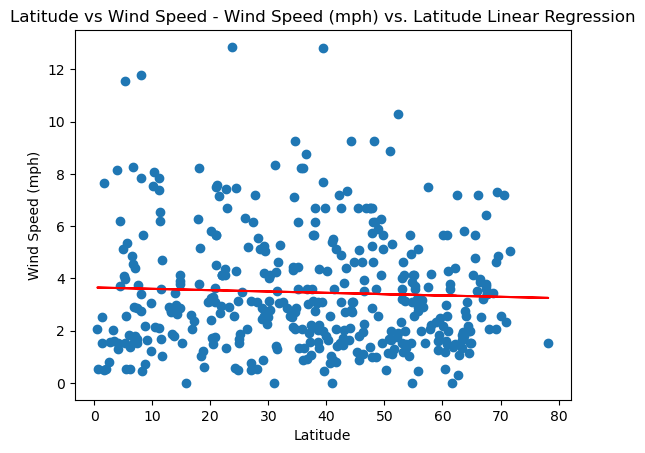

In [212]:
# Northern Hemisphere
# YOUR CODE HERE
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Latitude vs Wind Speed - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")



Text(0, 0.5, 'Wind Speed (mph)')

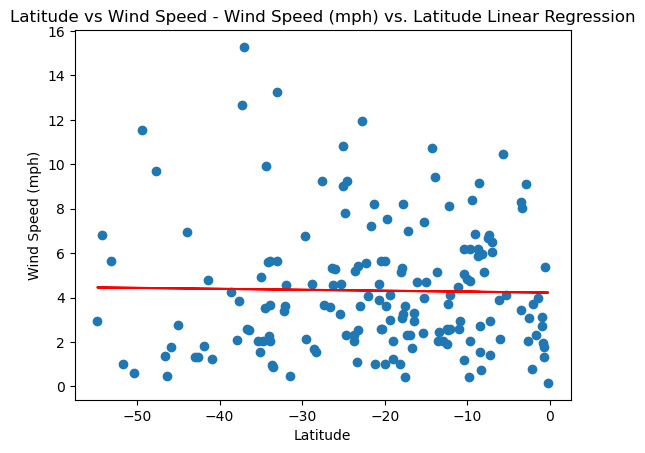

In [214]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Latitude vs Wind Speed - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The analysis of wind speed against latitude in both the Northern and Southern Hemispheres reveals interesting insights about the relationship between these variables. By comparing the scatter plots and linear regression results for both hemispheres, we can draw several conclusions about the global patterns of wind speed.

1. Scatter Plot Overview:
Both scatter plots show a wide dispersion of wind speed values across different latitudes.
In both hemispheres, the data points do not form a distinct pattern, indicating a lack of a strong linear relationship between latitude and wind speed.

2. Linear Regression Analysis:
The linear regression lines in both plots are nearly flat, with slight negative slopes. This suggests that, in general, wind speed does not significantly change with latitude.
The regression lines in both hemispheres indicate minimal differences in the relationship between latitude and wind speed, reinforcing the idea that latitude is not a strong predictor of wind speed.


3. Statistical Significance:
The flat regression lines in both hemispheres suggest no significant linear trend between latitude and wind speed.
The expected low R-squared values in both regression analyses confirm that latitude explains very little of the variability in wind speed. This is consistent across both the Northern and Southern Hemispheres.

4. Conclusion:
The linear regression analysis for both the Northern and Southern Hemispheres demonstrates no significant linear relationship between latitude and wind speed. This indicates that while latitude might influence other climatic factors, wind speed is influenced by a combination of more localized and regional factors.
To better understand the factors affecting wind speed, further analysis incorporating additional variables and more sophisticated modeling techniques is necessary. This could include studying the effects of atmospheric pressure patterns, proximity to large water bodies, topography, and seasonal variations.

In summary, the analysis reveals that latitude is not a significant determinant of wind speed in either hemisphere. This highlights the complexity of wind speed determinants and the need for a comprehensive approach in climatological and meteorological studies. The global consistency in these findings reinforces the importance of considering multiple factors when studying wind speed patterns.